In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = np.load('Dataset_Condensatore_Miscela.npy')

In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def downsampling(X, type):

    if type == 'simple':
        return X[:, ::5]

    if type == 'moving_avg':

        original_points = X.shape[1]
        target_points = 300
        window_size = int(original_points / target_points)
        data_moving_avg = np.array([moving_average(sample, window_size) for sample in X])

        print(data_moving_avg.shape)


        return data_moving_avg[:, ::10]

    if type == 'interpol':

        from scipy.interpolate import interp1d

        # Numero target di punti
        target_points = 1500

        # Creare nuovo array per i dati ridotti
        data_interpolated = np.zeros((X.shape[0], target_points))

        # Interpolare ciascun campione
        for i, sample in enumerate(X):
            x = np.linspace(0, len(sample)-1, len(sample))
            f = interp1d(x, sample, kind='linear')
            x_new = np.linspace(0, len(sample)-1, target_points)
            data_interpolated[i, :] = f(x_new)

        return data_interpolated

In [ ]:
def plot(X_train, y_train):
  idx = range(X_train.shape[1])
  class_0 = X_train[y_train == 0]
  class_1 = X_train[y_train == 1]
  # class_2 = X_train[y_train == 2]
  # class_3 = X_train[y_train == 3]
  # class_4 = X_train[y_train == 4]
  class_5 = X_train[y_train == 5]
  class_6 = X_train[y_train == 6]
  class_7 = X_train[y_train == 7]
  class_8 = X_train[y_train == 8]
  class_9 = X_train[y_train == 9]
  #class_10 = X_train[y_train == 10]
  class_11 = X_train[y_train == 11]
  #class_12 = X_train[y_train == 12]
  #class_13 = X_train[y_train == 13]
  class_14 = X_train[y_train == 14]
  class_15 = X_train[y_train == 15]

  print(f'class_-1: {X_train[y_train == -1].shape}')
  for x in range(16):
    print(f'class_{x}: {X_train[y_train == x].shape}')

  fig, axes = plt.subplots(5, 2, figsize=(8, 8))
  fig.subplots_adjust(hspace=0.5, wspace=0.4)

  for sample in range(3):
    axes[0][0].plot(idx, class_0[sample], linestyle='-', linewidth=0.8, color='b')
    axes[0][1].plot(idx, class_1[sample], linestyle='-', linewidth=0.8, color='b')
    axes[1][0].plot(idx, class_5[sample], linestyle='-', linewidth=0.8, color='b')
    axes[1][1].plot(idx, class_6[sample], linestyle='-', linewidth=0.8, color='b')
    axes[2][0].plot(idx, class_7[sample], linestyle='-', linewidth=0.8, color='b')
    axes[2][1].plot(idx, class_8[sample], linestyle='-', linewidth=0.8, color='b')
    axes[3][0].plot(idx, class_9[sample], linestyle='-', linewidth=0.8, color='b')
    axes[3][1].plot(idx, class_11[sample], linestyle='-', linewidth=0.8, color='b')
    axes[4][0].plot(idx, class_14[sample], linestyle='-', linewidth=0.8, color='b')
    axes[4][1].plot(idx, class_15[sample], linestyle='-', linewidth=0.8, color='b')


  axes[0][0].set_title('0')
  axes[0][1].set_title('1')
  axes[1][0].set_title('5')
  axes[1][1].set_title('6')
  axes[2][0].set_title('7')
  axes[2][1].set_title('8')
  axes[3][0].set_title('9')
  axes[3][1].set_title('11')
  axes[4][0].set_title('14')
  axes[4][1].set_title('15')


In [ ]:
X = dataset[:, 1100:-1]
y = dataset[:, -1]

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (297, 8900), y shape: (297,)


VISUALIZE ORIGINAL DATA

class_-1: (3, 8900)
class_0: (34, 8900)
class_1: (16, 8900)
class_2: (0, 8900)
class_3: (0, 8900)
class_4: (0, 8900)
class_5: (40, 8900)
class_6: (7, 8900)
class_7: (4, 8900)
class_8: (25, 8900)
class_9: (3, 8900)
class_10: (0, 8900)
class_11: (48, 8900)
class_12: (1, 8900)
class_13: (3, 8900)
class_14: (71, 8900)
class_15: (42, 8900)


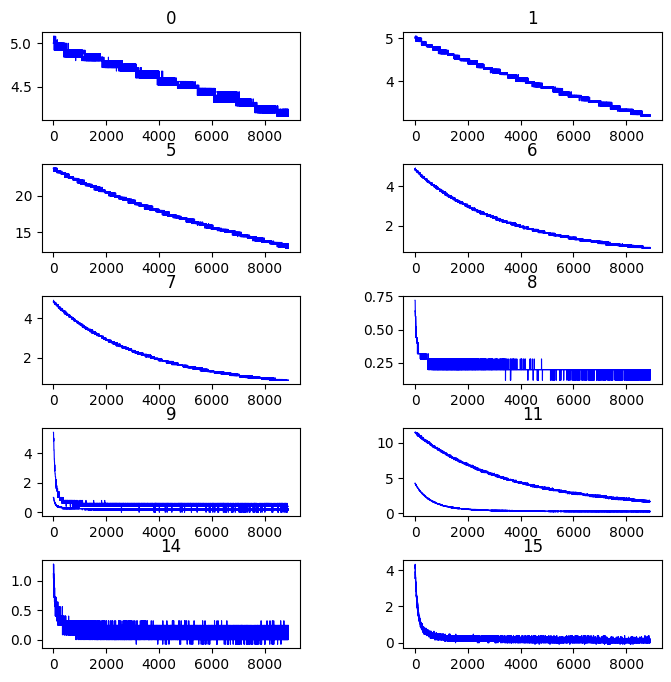

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot(X, y)

VISUALIZE SIMPLE DOWNSAMPLING

class_0: (27, 1780)
class_1: (12, 1780)
class_2: (0, 1780)
class_3: (0, 1780)
class_4: (0, 1780)
class_5: (37, 1780)
class_6: (5, 1780)
class_7: (4, 1780)
class_8: (17, 1780)
class_9: (3, 1780)
class_10: (0, 1780)
class_11: (36, 1780)
class_12: (1, 1780)
class_13: (2, 1780)
class_14: (58, 1780)
class_15: (32, 1780)


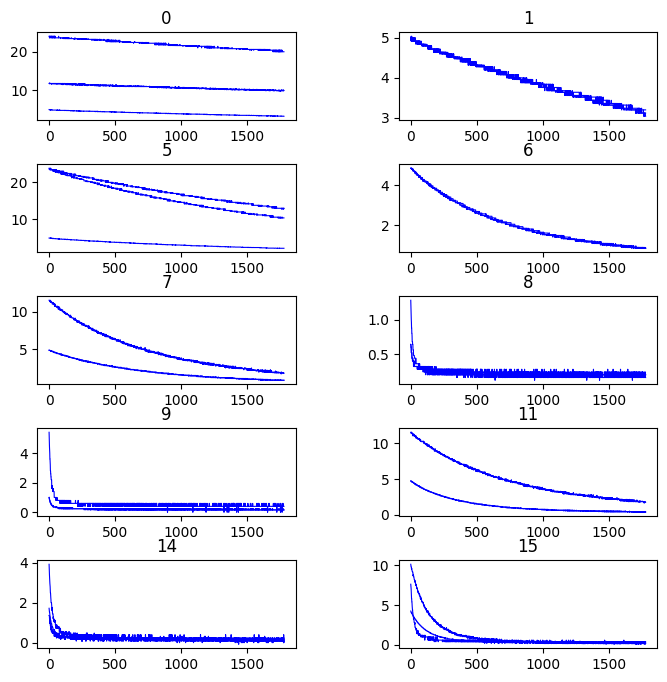

In [ ]:
X_simple = downsampling(X, 'simple')
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
plot(X_train, y_train)

In [ ]:
std_ = X_train.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
X_train_normalized = (X_train - X_train.mean(axis=1, keepdims=True)) / std_

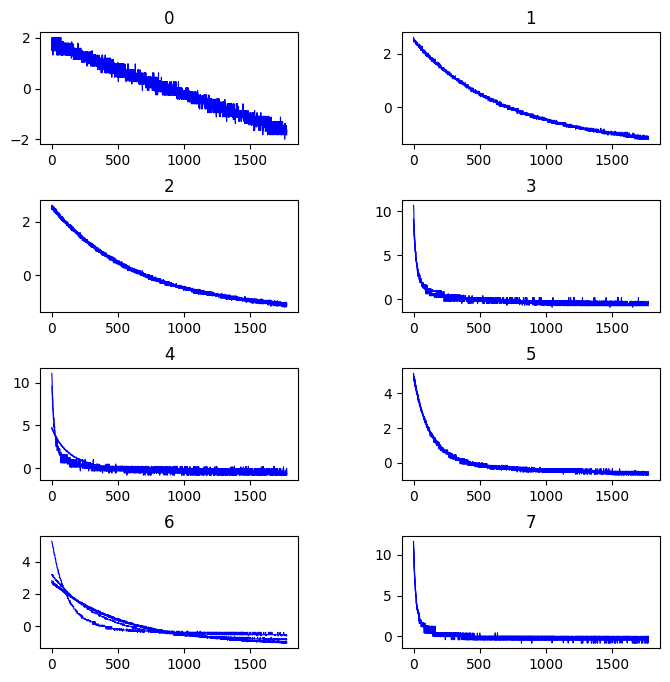

In [ ]:
plot(X_train_normalized, y_train)

VISUALIZE MOVING AVG DOWNSAMPLING

(297, 8872)
(297, 888)
class_0: (27, 888)
class_1: (12, 888)
class_2: (0, 888)
class_3: (0, 888)
class_4: (0, 888)
class_5: (37, 888)
class_6: (5, 888)
class_7: (4, 888)
class_8: (17, 888)
class_9: (3, 888)
class_10: (0, 888)
class_11: (36, 888)
class_12: (1, 888)
class_13: (2, 888)
class_14: (58, 888)
class_15: (32, 888)


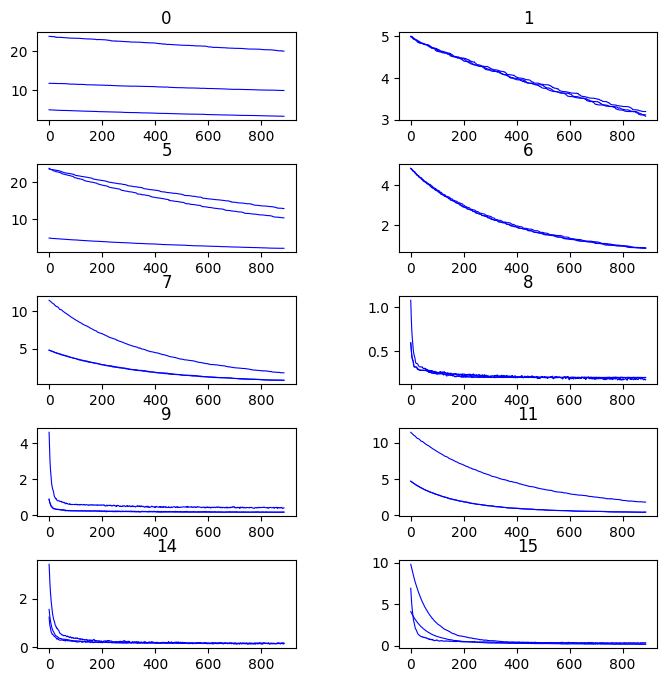

In [ ]:
X_avg = downsampling(X, 'moving_avg')
X_train, X_test, y_train, y_test = train_test_split(X_avg, y, test_size=0.2, random_state=42)
print(X_avg.shape)
plot(X_train, y_train)

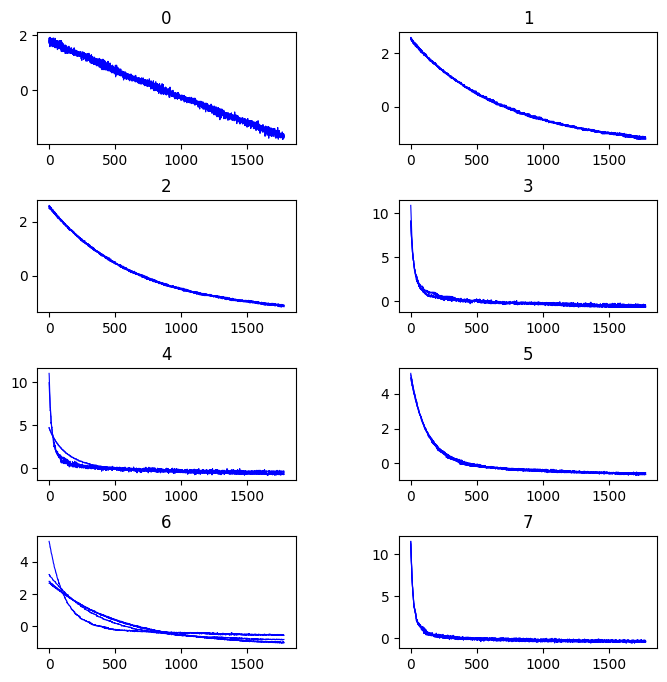

In [ ]:
std_ = X_train.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
X_train_normalized = (X_train - X_train.mean(axis=1, keepdims=True)) / std_
plot(X_train_normalized, y_train)

(350, 1500)


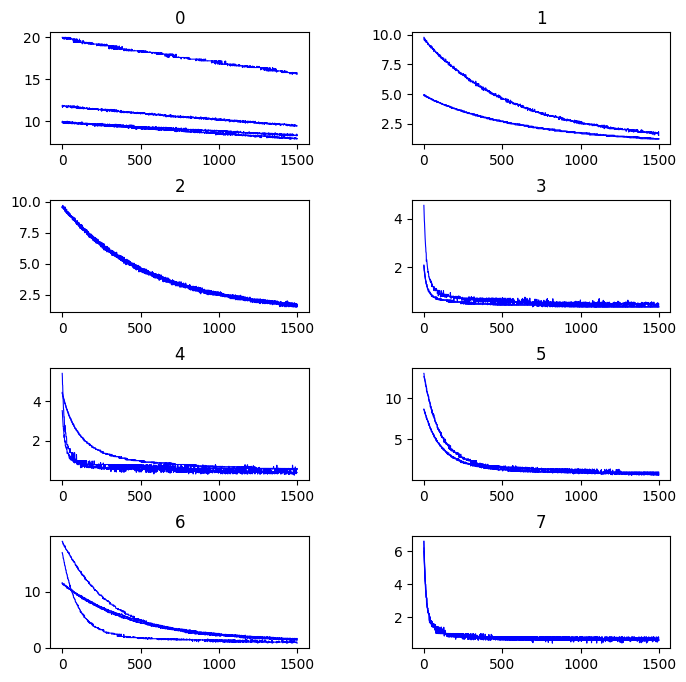

In [ ]:
X_interpol = downsampling(X, 'interpol')
X_train, X_test, y_train, y_test = train_test_split(X_interpol, y, test_size=0.2, random_state=42)
print(X_interpol.shape)
plot(X_train, y_train)

class_0: (159, 888)
class_1: (0, 888)
class_2: (0, 888)
class_3: (0, 888)
class_4: (0, 888)
class_5: (0, 888)
class_6: (9, 888)
class_7: (4, 888)
class_8: (9, 888)
class_9: (29, 888)
class_10: (21, 888)
class_11: (42, 888)
class_12: (0, 888)
class_13: (6, 888)
class_14: (1, 888)
class_15: (0, 888)


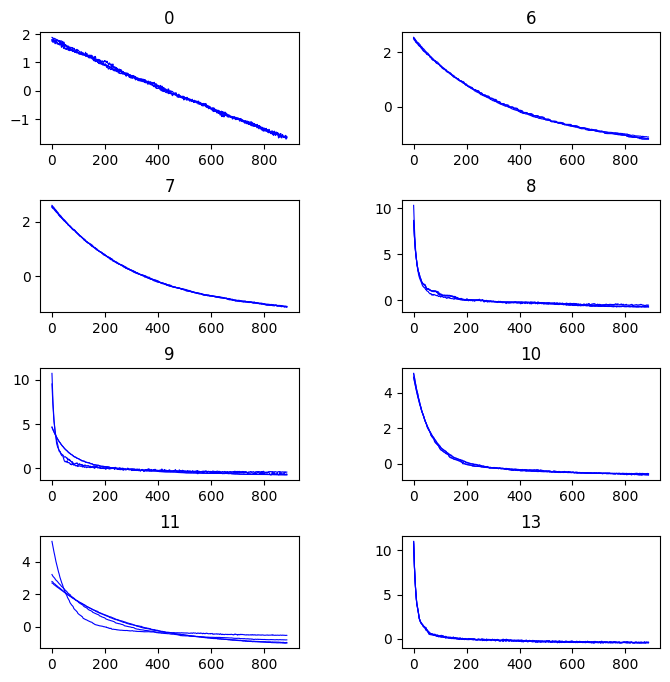

In [ ]:
std_ = X_train.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
X_train_normalized = (X_train - X_train.mean(axis=1, keepdims=True)) / std_
plot(X_train_normalized, y_train)